In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns



# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 



In [2]:
df_health = pd.read_csv("/Users/swatiraman/Downloads/drive-download-20210428T114902Z-001/df.csv")
df_health.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [3]:
df = df_health.drop(['SEQN','ORXGH','ORXGL','ORXH06','ORXH11','ORXH16','ORXH18','ORXH26','ORXH31','ORXH33','ORXH35','ORXH39',
'ORXH40','ORXH42','ORXH45','ORXH51','ORXH52','ORXH53','ORXH54','ORXH55','ORXH56','ORXH58','ORXH59','ORXH61',
'ORXH62','ORXH64','ORXH66','ORXH67','ORXH68','ORXH69','ORXH70','ORXH71','ORXH72','ORXH73','ORXH81','ORXH82',
'ORXH83','ORXH84','ORXHPC','ORXHPI','PHDSESN','DRD370A','DRD370B','DRD370C','DRD370D','DRD370E','DRD370F',
'DRD370G','DRD370H','DRD370I','DRD370J','DRD370K','DRD370L','DRD370M','DRD370N','DRD370O','DRD370P','DRD370Q',
'DRD370R', 'DRD370S','DRD370T','DRD370U','DRD370V','WTDR2D','LBXHBC','LBXTC','DR1TVARA','DR1TACAR','DR1TBCAR',
'DR1TCRYP','DR1TLYCO','DR1TATOC','DR1TCHOL','DR1TKCAL','DR1STY','DRQSPREP','DBQ095Z','DR1DAY','DR1DBIH',
'DRDINT','DRABF','WTSH2YR.x','LBXIHG','LBDIHGLC','LBDBGELC','LBDBGMLC','LBXBPB','LBDBPBSI','LBXBCD',
'LBDBCDSI','LBXTHG','DBD100','DMDMARTL','DMQMILIZ','AIALANGA','DBD100','DBQ095Z','DMDHHSIZ','DMDHHSZA','DMDHRBR4',
'DMDHREDU','DMDHRGND','DMDHRMAR','DMDYRSUS','DMQADFC','DMQMILIZ','DR1.300','DR1.300','DR1.320Z','DR1.320Z',
'DR1.330Z','DR1.330Z','DR1BWATZ','DR1HELPD','DR1LANG','DR1MNRSP','DR1SKY','DR1STY','DR1TACAR','DR1TALCO',
'DR1TALCO','DR1TCALC','DR1TCHOL','DR1TCOPP'],axis=1)


In [4]:
df.shape

(9813, 522)

In [5]:
df.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMDBORN4,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,8,2,1,69,NaN,4,4,1,NaN,1,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,8,2,1,54,NaN,3,3,1,NaN,1,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,8,2,1,72,NaN,3,3,2,NaN,1,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,8,2,1,9,NaN,3,3,1,119.0,1,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,8,2,2,73,NaN,3,3,1,NaN,1,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [6]:
for i in df.columns:
    if (df[i].isnull().sum() > 0 ):
        #df[i].fillna(df[i].median,inplace=True)
        print(i,'contain almost all null values',df[i].isnull().sum())

RIDAGEMN contain almost all null values 9171
RIDEXAGM contain almost all null values 5600
DMDCITZN contain almost all null values 4
DMDEDUC3 contain almost all null values 7110
DMDEDUC2 contain almost all null values 4225
RIDEXPRG contain almost all null values 8551
SIAPROXY contain almost all null values 1
FIALANG contain almost all null values 101
FIAPROXY contain almost all null values 101
FIAINTRP contain almost all null values 101
MIALANG contain almost all null values 2502
MIAPROXY contain almost all null values 2501
MIAINTRP contain almost all null values 2500
DMDHSEDU contain almost all null values 4616
INDHHIN2 contain almost all null values 113
INDFMIN2 contain almost all null values 103
INDFMPIR contain almost all null values 730
DR1EXMER contain almost all null values 1030
DRQSDIET contain almost all null values 1030
DRQSDT1 contain almost all null values 9290
DRQSDT2 contain almost all null values 9682
DRQSDT3 contain almost all null values 9692
DRQSDT4 contain almost all 

LBDR54.y contain almost all null values 7818
LBDR55.y contain almost all null values 7818
LBDR56.y contain almost all null values 7818
LBDR58.y contain almost all null values 7818
LBDR59.y contain almost all null values 7818
LBDR61.y contain almost all null values 7818
LBDR62.y contain almost all null values 7818
LBDR64.y contain almost all null values 7818
LBDR66.y contain almost all null values 7818
LBDR67.y contain almost all null values 7818
LBDR68.y contain almost all null values 7818
LBDR69.y contain almost all null values 7818
LBDR70.y contain almost all null values 7818
LBDR71.y contain almost all null values 7818
LBDR72.y contain almost all null values 7818
LBDR73.y contain almost all null values 7818
LBDR81.y contain almost all null values 7818
LBDR82.y contain almost all null values 7818
LBDR83.y contain almost all null values 7818
LBDR84.y contain almost all null values 7818
LBDR89.y contain almost all null values 7818
LBDRPI.y contain almost all null values 7818
WTSAF2YR.y

In [7]:
for i in df.columns:
    if (df[i].isnull().sum() > 5000):
        df.drop(i,axis=1,inplace=True)

In [8]:
df.shape

(9813, 191)

In [9]:
df.describe()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9813.0,9813.0,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9809.000000,5588.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,8.0,2.0,1.507694,31.629573,3.083766,3.277897,1.508509,1.219709,1.098787,3.520222,...,-1.734956,0.126363,-0.711343,0.820030,0.511885,2.087264,1.037003,2.810665,-0.255001,-0.679591
std,0.0,0.0,0.499966,24.397553,1.262812,1.607957,0.499953,1.579601,0.344094,1.232772,...,6.665694,6.126055,5.514023,4.847528,5.927111,5.582975,6.174046,5.767382,4.868527,5.174773
min,8.0,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-9.998027,-9.294397,-9.759888,-10.001466,-9.665313,-9.835496,-9.739738,-8.885937,-9.968040,-9.516987
25%,8.0,2.0,1.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,-8.764742,-5.856227,-4.772251,-2.817109,-5.081807,-2.314521,-4.252078,-2.047854,-4.709602,-4.487764
50%,8.0,2.0,2.000000,27.000000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,...,-4.423152,-1.185371,-1.379131,-0.259016,-1.039955,3.390824,4.159020,4.867756,-0.504415,-2.959643
75%,8.0,2.0,2.000000,52.000000,4.000000,4.000000,2.000000,1.000000,1.000000,5.000000,...,7.025565,6.354619,3.293431,5.817885,5.847951,6.708240,6.299989,8.099925,3.973927,3.068091
max,8.0,2.0,2.000000,80.000000,5.000000,7.000000,2.000000,77.000000,9.000000,9.000000,...,9.831464,9.718679,9.212580,9.852084,9.542277,9.379928,9.740811,9.819095,9.474146,8.250141


In [10]:
for i in df.columns:
    if (df[i].isnull().sum() > 0 ):
        df[i].fillna(0,inplace=True)
        #print(i,'contain almost all null values',df_health[i].isnull().sum())

In [11]:
df.shape

(9813, 191)

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

df_scaled.describe()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9813.0,9813.0,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,...,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03
mean,0.0,0.0,4.063916e-17,3.710926e-18,2.192614e-17,4.057807e-16,3.990603e-16,-5.110443e-17,6.857067e-16,-4.245842e-16,...,6.595944e-18,-2.613487e-17,-6.629886e-18,3.197279e-17,-3.254980e-17,1.733274e-17,1.712909e-17,2.525240e-17,1.731011e-17,-1.357656e-17
std,0.0,0.0,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,0.0,0.0,-1.015508e+00,-1.296490e+00,-1.650184e+00,-1.416713e+00,-1.017166e+00,-1.390983e-01,-3.186169e+00,-1.014610e+00,...,-1.239705e+00,-1.537897e+00,-1.641090e+00,-2.232488e+00,-1.717146e+00,-2.135666e+00,-1.745580e+00,-2.028164e+00,-1.995169e+00,-1.707871e+00
25%,0.0,0.0,-1.015508e+00,-8.865920e-01,-8.582604e-01,-7.947736e-01,-1.017166e+00,-1.390983e-01,-2.852712e-01,-1.014610e+00,...,-1.054675e+00,-9.766310e-01,-7.365068e-01,-7.503462e-01,-9.437948e-01,-7.884702e-01,-8.567073e-01,-8.424562e-01,-9.150260e-01,-7.359487e-01
50%,0.0,0.0,9.847288e-01,-1.897653e-01,-6.633663e-02,-1.728347e-01,9.831241e-01,-1.390983e-01,-2.852712e-01,-2.321053e-03,...,-4.033087e-01,-2.141346e-01,-1.211135e-01,-2.226084e-01,-2.618338e-01,2.335002e-01,5.056937e-01,3.566948e-01,-5.123258e-02,-4.406316e-01
75%,0.0,0.0,9.847288e-01,8.349799e-01,7.255871e-01,4.491042e-01,9.831241e-01,-1.390983e-01,-2.852712e-01,1.009968e+00,...,1.314337e+00,1.016735e+00,7.263260e-01,1.031064e+00,9.003270e-01,8.277328e-01,8.524805e-01,9.171456e-01,8.686700e-01,7.242583e-01
max,0.0,0.0,9.847288e-01,1.982694e+00,1.517511e+00,2.314921e+00,9.831241e-01,4.797677e+01,2.292191e+01,3.540689e+00,...,1.735305e+00,1.565903e+00,1.799853e+00,1.863324e+00,1.523652e+00,1.306299e+00,1.409813e+00,1.215246e+00,1.998478e+00,1.725715e+00


In [13]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(df_scaled)

In [14]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.99:
        break
    itr=itr+1

print('The number of principle components capturing 99 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 99 percent variation in data is :  109  Variance explained is  0.9902246357096733


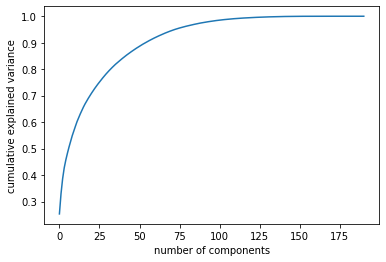

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
from sklearn.cluster import KMeans
cl=[5,6,10,20,30,40,45,50,60,70,80,100]
for k in cl:
    clust_mod=KMeans(n_clusters=k,max_iter=1000,random_state=0)
    clust_mod.fit(pcadata)
    print(k,silhouette_score(pcadata,clust_mod.labels_))

5 0.14343750726590765
6 0.12173361507957771
10 0.13421656901838389
20 0.15726836476323988
30 0.1808002647749542
40 0.17551966306823477
45 0.1729267284445258
50 0.16783798120389082
60 0.1633398739335334
70 0.16563403315175682
80 0.14126263490299462
100 0.13371140843864596


In [19]:
clusters = KMeans(n_clusters = 30, random_state = 10)

# fit the model
clusters.fit(pcadata)

# create a copy of the original dataframe
df_cluster = df_health.copy()


# add the cluster labels as the new column in the dataframe
df_cluster['Cluster_id'] = clusters.labels_

In [20]:
df_cluster[['SEQN','Cluster_id']].head(20)

,SEQN,Cluster_id
0,73557,4
1,73558,27
2,73559,16
3,73560,19
4,73561,8
5,73562,12
6,73563,9
7,73564,17
8,73566,8
9,73567,11


In [21]:
df_cluster[['SEQN','Cluster_id']].to_csv('/Users/swatiraman/Downloads/SwatiRaman.csv')